In [1]:
from google.colab import files
uploaded = files.upload()

Saving index.csv to index.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.shape

(1133, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [7]:
df.dropna(subset = ['card'],inplace=True)

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

In [10]:
print("\n--- Cleaned Data Info ---")
print(df.info())
print("\nFirst 5 rows of prepared data:")
print(df.head())


--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1044 non-null   object        
 1   datetime     1044 non-null   datetime64[ns]
 2   cash_type    1044 non-null   object        
 3   card         1044 non-null   object        
 4   money        1044 non-null   float64       
 5   coffee_name  1044 non-null   object        
 6   hour         1044 non-null   int32         
 7   day_of_week  1044 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 65.2+ KB
None

First 5 rows of prepared data:
         date                datetime cash_type                 card  money  \
0  2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01 2024-03-01 1

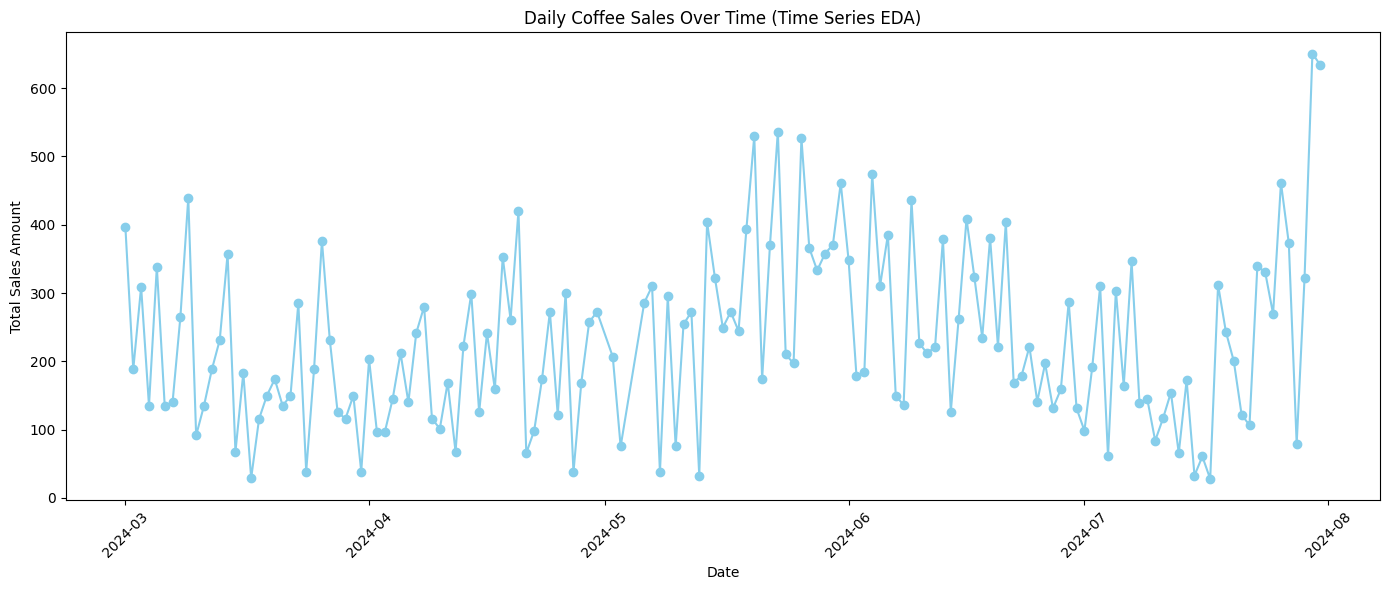

In [11]:
daily_sales = df.groupby('date')['money'].sum().reset_index()
daily_sales['date'] = pd.to_datetime(daily_sales['date'])


plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['money'], marker='o', linestyle='-', color='skyblue')
plt.title('Daily Coffee Sales Over Time (Time Series EDA)')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

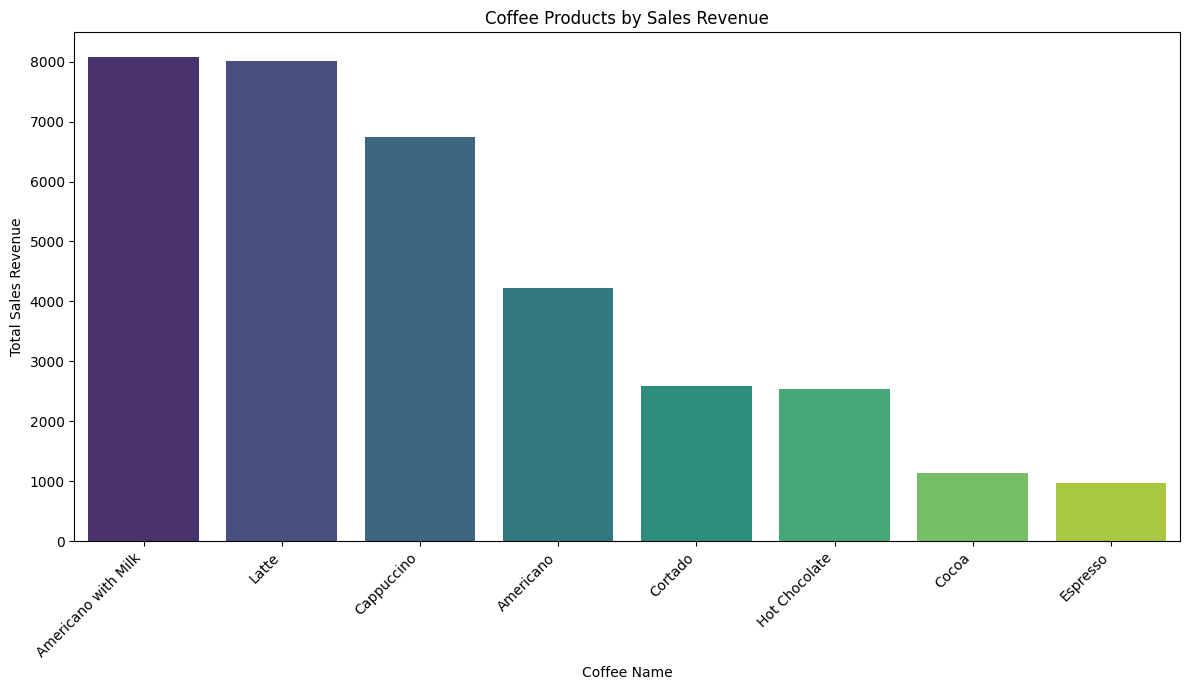

In [13]:
product_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")
plt.title('Coffee Products by Sales Revenue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [14]:
product_counts = df['coffee_name'].value_counts(ascending=False)
product_counts

,count
coffee_name,
Americano with Milk,253
Latte,218
Cappuccino,181
Americano,155
Cortado,94
Hot Chocolate,68
Espresso,44
Cocoa,31


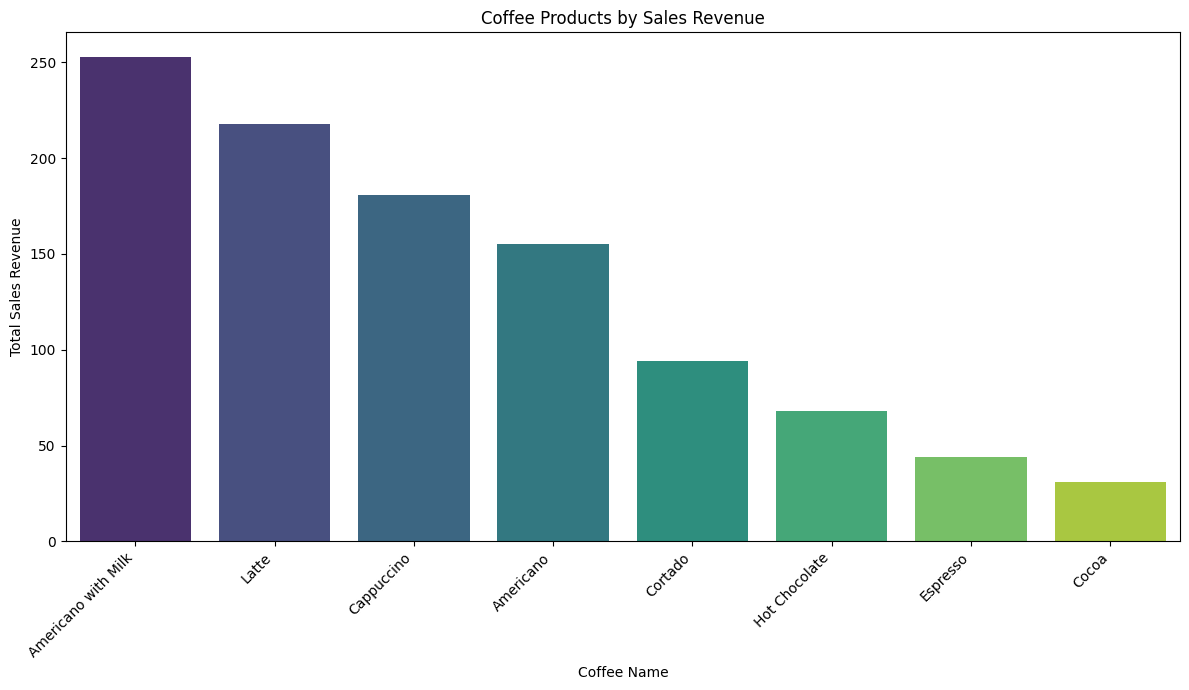

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.title('Coffee Products by Sales Revenue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

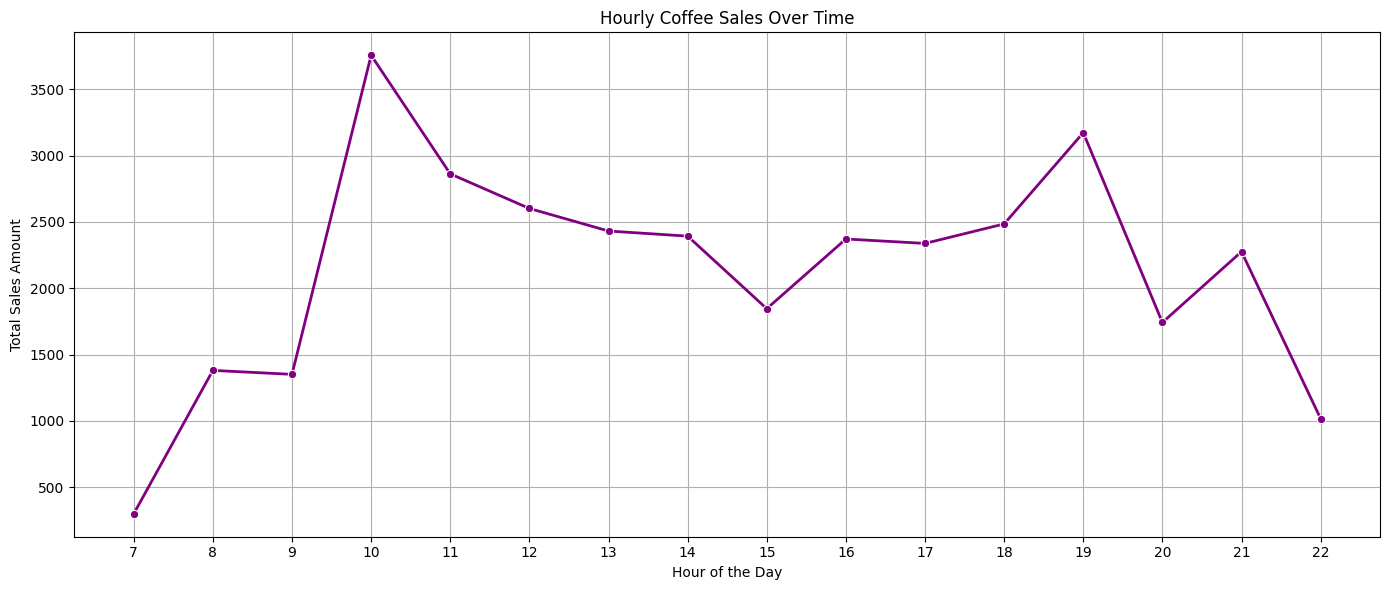

In [16]:
hourly_sales = df.groupby('hour')['money'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=hourly_sales['hour'], y=hourly_sales['money'], marker='o', color='purple', linewidth=2)
plt.title('Hourly Coffee Sales Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales Amount')
plt.xticks(hourly_sales['hour'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
peak_hour = hourly_sales.loc[hourly_sales['money'].idxmax()]
print(f"\nPeak Sales Hour: {int(peak_hour['hour']):02d}:00 with Sales of {peak_hour['money']:.2f}")



Peak Sales Hour: 10:00 with Sales of 3757.18


In [18]:
df2 = df.copy()

In [19]:
df2["Year"]       = df2["datetime"].dt.year
df2["Month"]      = df2["datetime"].dt.month
df2["Month_Name"] = df2["datetime"].dt.month_name()
df2["Day"]        = df2["datetime"].dt.day
df2["Day_Name"]   = df2["datetime"].dt.day_name()
df2["Hour"]       = df2["datetime"].dt.hour
df2["Minute"]     = df2["datetime"].dt.minute
df2["Second"]     = df2["datetime"].dt.second
df2["Quarter"]    = df2["datetime"].dt.quarter
df2["Weekday"]    = df2["datetime"].dt.weekday        # 0 = Monday
df2["Week"]       = df2["datetime"].dt.isocalendar().week
df2.drop(columns=["datetime"],inplace=True)



In [20]:
df2.drop(columns=["day_of_week"],inplace=True)

In [21]:
df2.head()

,date,cash_type,card,money,coffee_name,hour,Year,Month,Month_Name,Day,Day_Name,Hour,Minute,Second,Quarter,Weekday,Week
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10,2024,3,March,1,Friday,10,15,50,1,4,9
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,2024,3,March,1,Friday,12,19,22,1,4,9
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,2024,3,March,1,Friday,12,20,18,1,4,9
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13,2024,3,March,1,Friday,13,46,33,1,4,9
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13,2024,3,March,1,Friday,13,48,14,1,4,9


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_ml = df2.copy()

# Encode all categorical columns (including 'card')
for col in ["cash_type", "coffee_name", "Month_Name", "Day_Name", "card"]:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

# Fix Week column type if needed
df_ml["Week"] = df_ml["Week"].astype(int)

# Features and target
X = df_ml.drop(columns=["money", "date"])
y = df_ml["money"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.34
R² Score: 0.9952


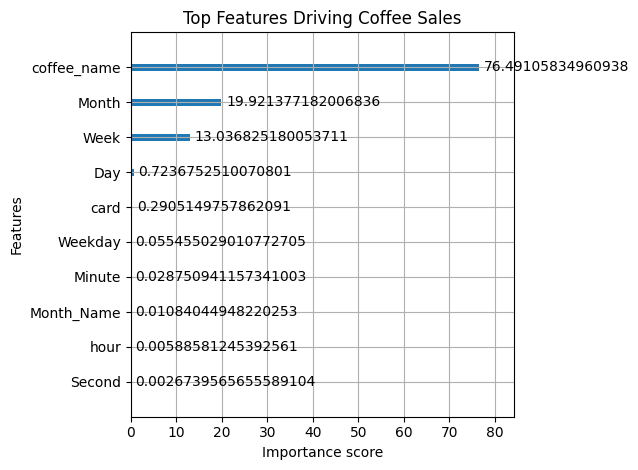

In [24]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top Features Driving Coffee Sales")
plt.tight_layout()
plt.show()